# Comparison between the probands' location of marriage and their parents'

The goal of this Jupyter notebook is to provide a heatmap for supplementary figure 2 that compares the location of marriage of the probands with that of their parents.

In [1]:
import csv
import json
import pickle
import pandas as pd

The paths to the datasets are found in the *paths.json* file.

In [2]:
with open("../paths.json", 'r') as file:
    paths = json.load(file)

The list of probands is loaded from the pickle generated at step 1.

In [3]:
with open(paths['wd'] + "results/pickles/balsac_pro_0.5_nosibs.pkl", 'rb') as file:
    pro = pickle.load(file)
len(pro)

26445

Create dictionaries for municipality and region codes.

In [4]:
city_code_to_string = {}
with open(paths['geography_definitions'], 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        UrbMariage, UrbIdMariage, *_ = row
        city_code_to_string[int(UrbIdMariage)] = UrbMariage
region_code_to_string = {
    25705: "Abitibi",
    25706: "Bas-Saint-Laurent",
    25707: "Beauce",
    25708: "Bois-Francs",
    25709: "Charlevoix",
    25710: "Côte-de-Beaupré",
    25711: "Côte-du-Sud",
    25712: "Côte-Nord",
    25713: "Estrie",
    25714: "Gaspésie",
    25715: "Île-de-Montréal",
    25716: "Îles-de-la-Madeleine",
    25717: "Lanaudière",
    25718: "Laurentides",
    25719: "Mauricie",
    25720: "Outaouais",
    25721: "Agglomération de Québec",
    25722: "Région de Québec",
    25723: "Nord du Québec",
    25724: "Richelieu",
    25725: "Rive Nord-Ouest de Montréal",
    25726: "Rive Sud de Montréal",
    25727: "Saguenay–Lac-Saint-Jean",
    25728: "Témiscamingue",
    27118: "Côte-de-Beaupré",
    27119: "Portneuf",
    27120: "Lévis-Lotbinière"
}

Create dictionaries for proband and parent information.

In [5]:
city_proband = {}
region_proband = {}
year_proband = {}
city_parent = {}
region_parent = {}
year_parent = {}

with open(paths['demography_information'], 'r', encoding='cp1252') as file:
    reader = csv.reader(file, delimiter=';')
    next(reader)  # Skip header row
    for row in reader:
        if len(row) == 0: break
        IndID, CaG, ERRQ, PereID, MereID, Sexe, PaysOrigine, DateNaissance, RegionNaissance, \
        DateDeces, RegionDeces, DateMariage, ConjointID, URBMariage, RegionMariage, \
        DateMariageParents, URBMariageParents, RegionMariageParents = row

        IndID = int(IndID) if IndID != 'NA' else 0
        URBMariage = int(URBMariage) if URBMariage != 'NA' else 0
        RegionMariage = int(RegionMariage) if RegionMariage != 'NA' else 0
        DateMariage = int(DateMariage) if DateMariage != 'NA' else 0
        URBMariageParents = int(URBMariageParents) if URBMariageParents != 'NA' else 0
        RegionMariageParents = int(RegionMariageParents) if RegionMariageParents != 'NA' else 0
        DateMariageParents = int(DateMariageParents) if DateMariageParents != 'NA' else 0

        city_proband[IndID] = city_code_to_string.get(URBMariage, 0)
        region_proband[IndID] = region_code_to_string.get(RegionMariage, 0)
        year_proband[IndID] = DateMariage
        city_parent[IndID] = city_code_to_string.get(URBMariageParents, 0)
        region_parent[IndID] = region_code_to_string.get(RegionMariageParents, 0)
        year_parent[IndID] = DateMariageParents

Define the watercourse subdivisions.

In [6]:
city_to_water_boundary = {
    "Albanel": "Ashuapmushuan-Mistassini",
    "Alma": "East of Lac Saint-Jean",
    "Arvida": "South of Saguenay River",
    "Bégin": "North of Saguenay River",
    "Chambord": "Métabetchouane-Ashuapmushuan",
    "Chicoutimi": "South of Saguenay River",
    "Chicoutimi-Nord": "North of Saguenay River",
    "Chute-des-Passes": "Mistassini-Péribonka",
    "Delisle": "East of Lac Saint-Jean",
    "Desbiens": "La-Belle-Rivière–Métabetchouane",
    "Dolbeau": "Ashuapmushuan-Mistassini",
    "Ferland-et-Boilleau": "South of Saguenay River",
    "Girardville": "Ashuapmushuan-Mistassini",
    "Hébertville": "East of Lac Saint-Jean",
    "Hébertville-Station": "East of Lac Saint-Jean",
    "Jonquière": "South of Saguenay River",
    "L'Anse-Saint-Jean": "East of Ha! Ha!",
    "L'Ascension-de-Notre-Seigneur": "East of Lac Saint-Jean",
    "La Baie": "South of Saguenay River",
    "La Doré": "Métabetchouane-Ashuapmushuan",
    "Labrecque": "East of Lac Saint-Jean",
    "Lac-Bouchette": "Métabetchouane-Ashuapmushuan",
    "Lac-Kénogami": "South of Saguenay River",
    "Lac-à-la-Croix": "La-Belle-Rivière–Métabetchouane",
    "Larouche": "South of Saguenay River",
    "Laterrière": "South of Saguenay River",
    "Mashteuiatsh": "Métabetchouane-Ashuapmushuan",
    "Mistassini": "Mistassini-Péribonka",
    "Métabetchouan": "La-Belle-Rivière–Métabetchouane",
    "Mont-Apica": "East of Lac Saint-Jean",
    "Normandin": "Ashuapmushuan-Mistassini",
    "Notre-Dame-de-Lorette": "Mistassini-Péribonka",
    "Notre-Dame-du-Rosaire": "East of Lac Saint-Jean",
    "Petit-Saguenay": "East of Ha! Ha!",
    "Péribonka": "Mistassini-Péribonka",
    "Rivière-Éternité": "East of Ha! Ha!",
    "Roberval": "Métabetchouane-Ashuapmushuan",
    "Saint-Ambroise": "North of Saguenay River",
    "Saint-André-du-Lac-Saint-Jean": "La-Belle-Rivière–Métabetchouane",
    "Saint-Augustin-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Saint-Bruno": "East of Lac Saint-Jean",
    "Saint-Charles-de-Bourget": "North of Saguenay River",
    "Saint-David-de-Falardeau": "North of Saguenay River",
    "Saint-Edmond": "Ashuapmushuan-Mistassini",
    "Saint-Eugène-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Saint-François-de-Sales": "Métabetchouane-Ashuapmushuan",
    "Saint-Fulgence": "North of Saguenay River",
    "Saint-Félicien": "Métabetchouane-Ashuapmushuan",
    "Saint-Félix-d'Otis": "East of Ha! Ha!",
    "Saint-Gédéon": "East of Lac Saint-Jean",
    "Saint-Henri-de-Taillon": "East of Lac Saint-Jean",
    "Saint-Honoré-de-Chicoutimi": "North of Saguenay River",
    "Saint-Ludger-de-Milot": "Mistassini-Péribonka",
    "Saint-Méthode": "Ashuapmushuan-Mistassini",
    "Saint-Nazaire": "East of Lac Saint-Jean",
    "Saint-Prime": "Métabetchouane-Ashuapmushuan",
    "Saint-Stanislas-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Saint-Thomas-Didyme": "Ashuapmushuan-Mistassini",
    "Sainte-Hedwidge": "Métabetchouane-Ashuapmushuan",
    "Sainte-Jeanne-d'Arc-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Sainte-Monique-de-Honfleur": "East of Lac Saint-Jean",
    "Sainte-Rose-du-Nord": "North of Saguenay River",
    "Sainte-Élisabeth-de-Proulx": "Mistassini-Péribonka",
    "Shipshaw": "North of Saguenay River",
    "Val-Jalbert": "Métabetchouane-Ashuapmushuan",
    'Baie-Sainte-Catherine': 'Charlevoix',
    'Baie-Saint-Paul': 'Charlevoix',
    "Cap A L'aigle": 'Charlevoix',
    'Clermont': 'Charlevoix',
    'La Malbaie': 'Charlevoix',
    'Les Éboulements': 'Charlevoix',
    'Notre Dame Des Monts': 'Charlevoix',
    'Petite-Rivière-Saint-François': 'Charlevoix',
    'Pointe-au-Pic': 'Charlevoix',
    'St Aime Des Lacs': 'Charlevoix',
    "Saint-Bernard-de-l'Isle-aux-Coudres": 'Charlevoix',
    'Sainte-Agnès': 'Charlevoix',
    'Saint-Fidèle-de-Mont-Murray': 'Charlevoix',
    'Saint-Hilarion': 'Charlevoix',
    'Saint-Irénée': 'Charlevoix',
    'Saint-Joseph-de-la-Rive': 'Charlevoix',
    "Saint-Louis-de-l'Isle-aux-Coudres": 'Charlevoix',
    'Saint-Siméon': 'Charlevoix',
    'Saint-Urbain-de-Charlevoix': 'Charlevoix'
}

Get the watercourse subdivision of each proband.

In [7]:
subdivisions = [city_to_water_boundary[city_proband[ind]] for ind in pro]
subdivisions[:10]

['Mistassini-Péribonka',
 'South of Saguenay River',
 'South of Saguenay River',
 'South of Saguenay River',
 'South of Saguenay River',
 'East of Lac Saint-Jean',
 'East of Lac Saint-Jean',
 'South of Saguenay River',
 'South of Saguenay River',
 'South of Saguenay River']

Sort the watercourse subdivisions.

In [8]:
subdivisions_order = [
    "East of Ha! Ha!",
    "South of Saguenay River",
    "North of Saguenay River",
    "East of Lac Saint-Jean",
    "La-Belle-Rivière–Métabetchouane",
    "Mistassini-Péribonka",
    "Métabetchouane-Ashuapmushuan",
    "Ashuapmushuan-Mistassini"
]

Plot the heatmap.

In [9]:
parents_subdivisions = [city_to_water_boundary.get(city_parent[ind], "Outside Charlevoix/SLSJ") for ind in pro]
parents_subdivisions[:10]

['Métabetchouane-Ashuapmushuan',
 'Outside Charlevoix/SLSJ',
 'Charlevoix',
 'Outside Charlevoix/SLSJ',
 'Outside Charlevoix/SLSJ',
 'East of Lac Saint-Jean',
 'Métabetchouane-Ashuapmushuan',
 'South of Saguenay River',
 'South of Saguenay River',
 'South of Saguenay River']

In [10]:
migratory_df = pd.DataFrame({
    "Proband's subdivision of marriage": subdivisions,
    "Parents' subdivision of marriage": parents_subdivisions})
migratory_df

,Proband's subdivision of marriage,Parents' subdivision of marriage
0,Mistassini-Péribonka,Métabetchouane-Ashuapmushuan
1,South of Saguenay River,Outside Charlevoix/SLSJ
2,South of Saguenay River,Charlevoix
3,South of Saguenay River,Outside Charlevoix/SLSJ
4,South of Saguenay River,Outside Charlevoix/SLSJ
...,...,...
26440,South of Saguenay River,Outside Charlevoix/SLSJ
26441,Ashuapmushuan-Mistassini,Outside Charlevoix/SLSJ
26442,Ashuapmushuan-Mistassini,Outside Charlevoix/SLSJ
26443,East of Lac Saint-Jean,East of Lac Saint-Jean


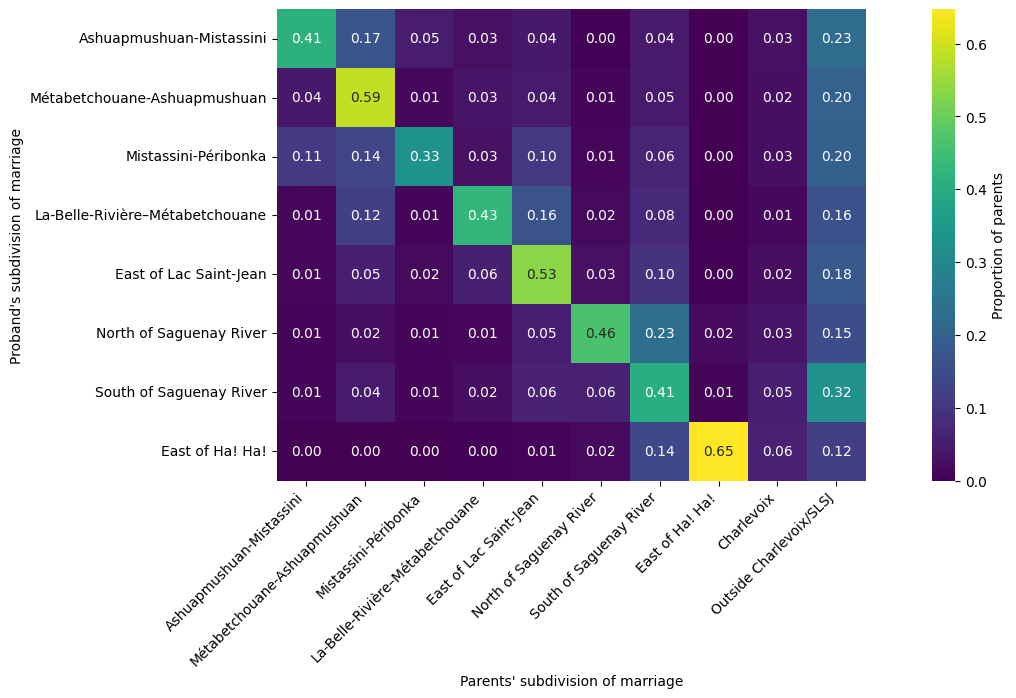

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(180*2/25.4, 90*2/25.4))

subdivisions_probands = [
    "Ashuapmushuan-Mistassini",
    "Métabetchouane-Ashuapmushuan",
    "Mistassini-Péribonka",
    "La-Belle-Rivière–Métabetchouane",
    "East of Lac Saint-Jean",
    "North of Saguenay River",
    "South of Saguenay River",
    "East of Ha! Ha!",
]

subdivisions_parents = [
    "Ashuapmushuan-Mistassini",
    "Métabetchouane-Ashuapmushuan",
    "Mistassini-Péribonka",
    "La-Belle-Rivière–Métabetchouane",
    "East of Lac Saint-Jean",
    "North of Saguenay River",
    "South of Saguenay River",
    "East of Ha! Ha!",
    "Charlevoix",
    "Outside Charlevoix/SLSJ"
]

count_table = pd.crosstab(
    migratory_df["Proband's subdivision of marriage"],
    migratory_df["Parents' subdivision of marriage"],
    rownames=['Proband'],
    colnames=['Parents'],
    dropna=False
).reindex(index=subdivisions_probands, columns=subdivisions_parents)

# Row-wise proportions
prop_table = count_table.div(count_table.sum(axis=1), axis=0)

sns.heatmap(
    prop_table,
    annot=True,
    fmt=".2f", 
    cmap="viridis",
    cbar=True
)

cbar = fig.get_axes()[0].collections[0].colorbar
cbar.set_label("Proportion of parents")
fig.get_axes()[0].set_xticklabels(fig.get_axes()[0].get_xticklabels(), rotation=45, ha='right')
fig.get_axes()[0].set_aspect('equal')  # Square cells
fig.get_axes()[0].set_ylabel("Proband's subdivision of marriage")
fig.get_axes()[0].set_xlabel("Parents' subdivision of marriage")

# Adjust layout and save
plt.tight_layout()

# Save the figure
plt.savefig(paths['wd'] + "results/supp_figures/1.MarriageHeatmap.svg", bbox_inches='tight', dpi=300)

plt.show()